In [1145]:
#Import useful libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statistics as statistics
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [1146]:
#Read in CSVs
celestial_data = pd.read_csv(filepath_or_buffer='Ex_Hubble1.csv') #This is linear regression training data
h0_experimental_data = pd.read_csv(filepath_or_buffer='./Ex_Hubble2.csv') #Values of H0 from various literature

<h3>Part A</h3>

Hubble's law states:
$$ v =  H_0d$$
For $d$ the proper distance of the galaxy and $v$ the time derivative of the proper distance.
Hence
$$ H_0 = v/d$$

Let's take a look at the columns in the celestial dataframe

In [1147]:
celestial_data

,Object,Distance [Mpc],Sta. Desv. [Mpc],Method,"Velocity, cz [km s-1]",Uncert. [km s-1],z reference
0,SDSS-II SN 16111,824.0,NaN,SNIa,64455.38,NaN,2011ApJ...738..162S
1,SDSS-II SN 03957,547.0,NaN,SNIa,41071.57,NaN,2011ApJ...738..162S
2,2MASX J23024668+0848186,170.0,NaN,SNIa,11991.70,NaN,2011CBET.2931A...1B
3,SDSS-II SN 15080,969.0,NaN,SNIa,77646.25,NaN,2011ApJ...738..162S
4,UGC 11750,148.0,NaN,Tully-Fisher,12727.09,33.88,2012ApJS..199...26H
...,...,...,...,...,...,...,...
95,SDSS-II SN 15934,950.0,NaN,SNIa,75847.49,NaN,2011ApJ...738..162S
96,SDSS-II SN 16481,1070.0,NaN,SNIa,87539.40,NaN,2011ApJ...738..162S
97,UGC 10820,135.0,NaN,Tully-Fisher,9543.89,36.87,2012ApJS..199...26H
98,SDSS-II SN 18917,642.0,NaN,SNIa,48866.17,NaN,2011ApJ...738..162S


From Velocity, Distance columns it is possible to calculate a $H_0$ column.

In [1148]:
#Calculate and append a H0 column
celestial_data['Calculated H0 [km s -1 MPc -1]'] = celestial_data['Velocity, cz [km s-1]'] / celestial_data['Distance [Mpc]']
celestial_h0 = celestial_data['Calculated H0 [km s -1 MPc -1]']

In [1149]:
#Investigating the mean and standard deviation of Hubble's constant.
celestial_data.describe()

,Distance [Mpc],Sta. Desv. [Mpc],"Velocity, cz [km s-1]",Uncert. [km s-1],Calculated H0 [km s -1 MPc -1]
count,100.000000,6.000000,100.000000,18.000000,100.000000
mean,775.380700,2.691667,61422.543100,91.871667,78.272266
std,328.169375,1.180177,27225.631533,60.378037,4.515657
min,89.000000,0.580000,6295.640000,12.890000,64.436591
25%,611.250000,2.297500,46317.935000,34.627500,75.309090
50%,852.000000,3.185000,65414.715000,101.930000,78.691173
75%,1030.000000,3.540000,82068.185000,149.900000,81.205922
max,1190.000000,3.540000,98931.510000,149.900000,95.436318


In [1150]:
#Calculate and display the median
celestial_data['Calculated H0 [km s -1 MPc -1]'].median()

78.6911730545877

Lets estimate Hubble's constant as the gradient of a simple order 1 fit.

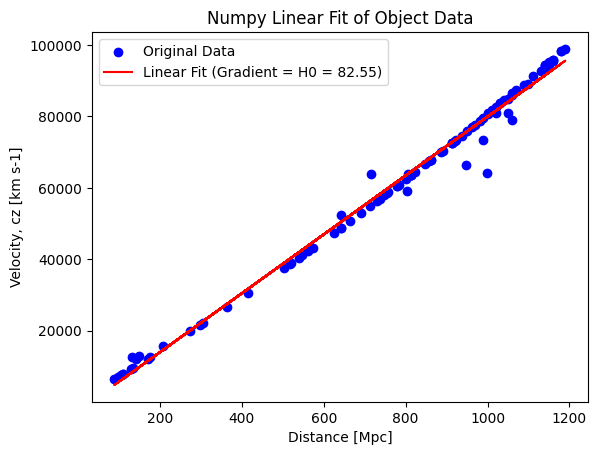

In [1151]:
x = celestial_data['Distance [Mpc]'].values  # Extract the 'Distance [Mpc]' column as a NumPy array
y = celestial_data['Velocity, cz [km s-1]'].values  # Extract the 'Velocity, cz [km s-1]' column as a NumPy array

# Perform linear fit
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
gradient = coefficients[0]
# Generate predicted values
y_fit = poly(x)

# Plot the original data and the linear fit
plt.scatter(x, y, color='b', label='Original Data')
plt.plot(x, y_fit, color='r', label=f'Linear Fit (Gradient = H0 = {gradient:.2f})')  # Adding the gradient to the label

# Set plot labels and title
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity, cz [km s-1]')
plt.title('Numpy Linear Fit of Object Data')
plt.legend()
plt.show()

The estimated value of $H_0$ a simple linear fit on the original unmodified data set is far from the accepted theoretical value of ~ 68 km s -1 Mpc -1 
<br><br>
Instead, let's perform some analysis and use the more sophisticated linear regression model.

In [1152]:
#Investigate the correlation between Velocity and distance
celestial_data.corr()['Velocity, cz [km s-1]']


Distance [Mpc]                    0.995044
Sta. Desv. [Mpc]                  0.952771
Velocity, cz [km s-1]             1.000000
Uncert. [km s-1]                  0.673969
Calculated H0 [km s -1 MPc -1]    0.561504
Name: Velocity, cz [km s-1], dtype: float64

Despite the poor value of $H_0$ we see a very large correlation coefficient for distance and velocity.
<br><br>
Let's use a pairplot to visually assess this.

Text(0.5, 1.08, 'Distance Velocity Pairplot')

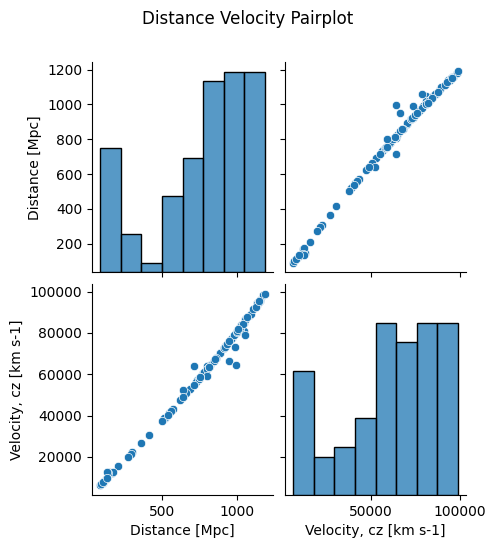

In [1153]:
graph = sns.pairplot(celestial_data,vars=('Distance [Mpc]','Velocity, cz [km s-1]'))
graph.fig.suptitle('Distance Velocity Pairplot',y=1.08)

Also, it may be helpful to use heatmaps to provide both a visual and numerical indicator of correlation.

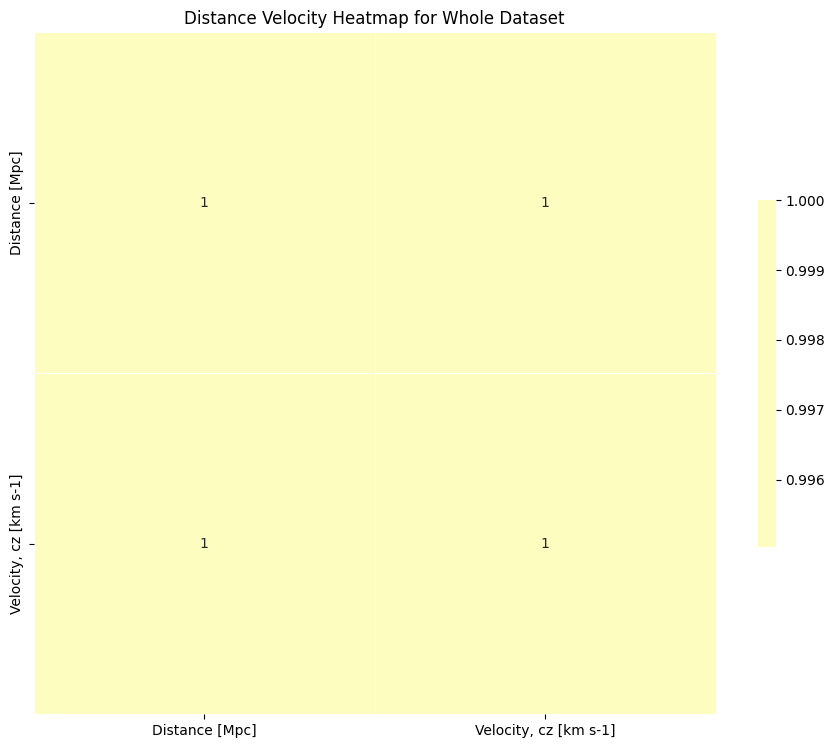

In [1154]:
#Store the correlation data
snia_corr = celestial_data[['Distance [Mpc]', 'Velocity, cz [km s-1]']].corr()

#Create figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap  
sns.heatmap(snia_corr, cmap='magma', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Distance Velocity Heatmap for Whole Dataset')
plt.show()

Can see a strong linear relationship as expected which is described by Hubbles Law.<br><br>
Within the method column there are two unique methods. Lets investigate them seperately.

In [1155]:
#Instantiate the subset dataframes for the respective 'SNIa' and 'Tully-Fisher' methods
celestial_data_SNIa = celestial_data[celestial_data['Method'] == 'SNIa']
celestial_data_Tully_Fisher = celestial_data[celestial_data['Method'] == 'Tully-Fisher']


Text(0.5, 1.08, 'Distance-Velocity Pairplot SNIa method')

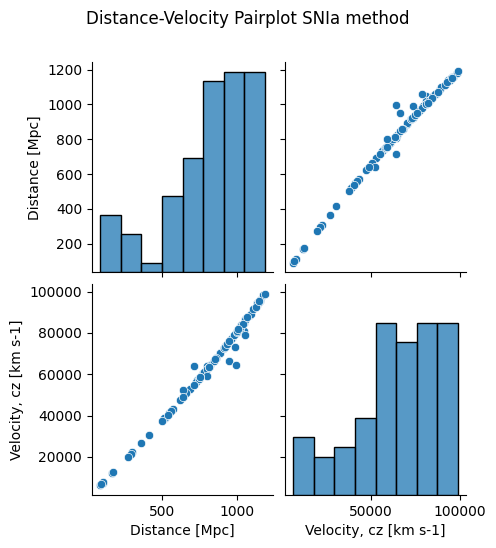

In [1156]:
#Plotting for the SNIa experimental method
graph = sns.pairplot(celestial_data_SNIa,vars=('Distance [Mpc]','Velocity, cz [km s-1]'))
graph.fig.suptitle('Distance-Velocity Pairplot SNIa method',y=1.08)

We can see many points lay below the linear relationship at large distances, this may be due to the presence of cosmic dust which dims incident light for far away galaxies and makes them appear as farther than they are. This would explain why many galaxies have a lower than expected velocity, since they are being incorrectly calculated as more distant.

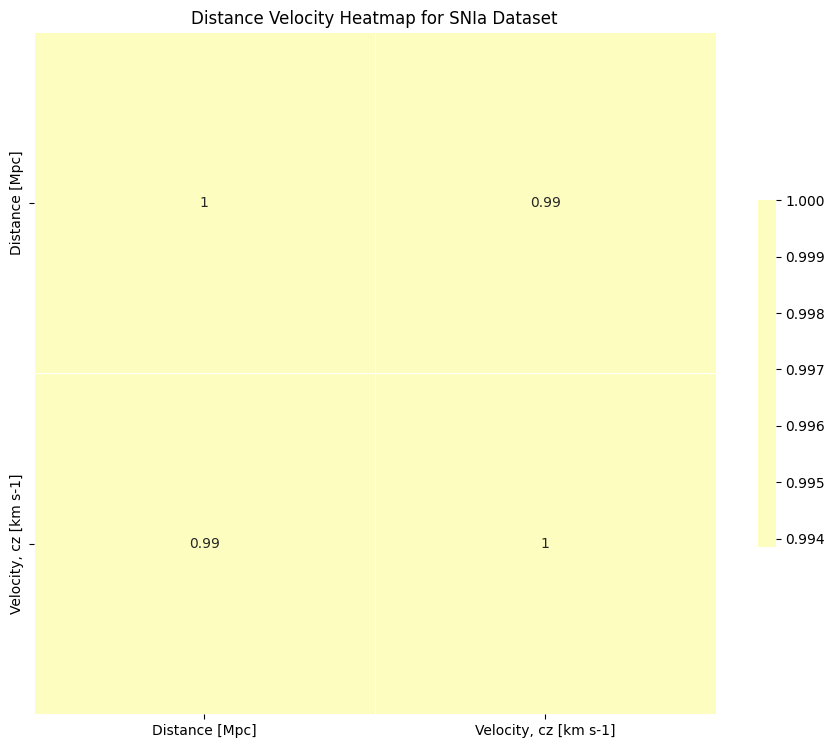

In [1157]:
snia_corr = celestial_data_SNIa[['Distance [Mpc]', 'Velocity, cz [km s-1]']].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(110, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(snia_corr, cmap='magma', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Distance Velocity Heatmap for SNIa Dataset')
plt.show()

The correlation coefficient is slightly lower in the SNIa data set, counterintuitively though the graph holds a much stronger linear shape within the first half of the distance range.

Text(0.5, 1.06, 'Pairplot for Tully-Fisher Method')

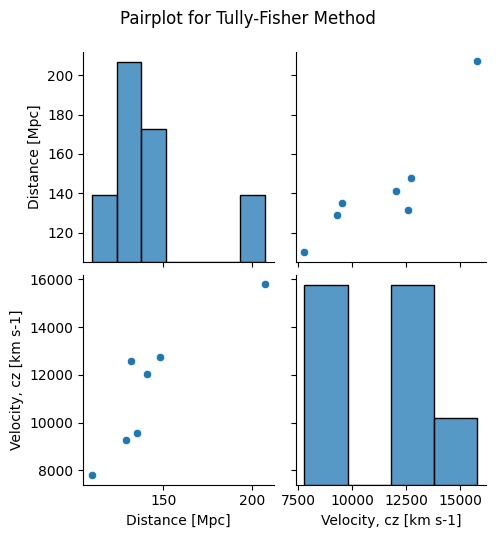

In [1158]:
#Plotting for the Tully-Fisher experimental method
graph = sns.pairplot(celestial_data_Tully_Fisher,vars=('Distance [Mpc]','Velocity, cz [km s-1]'))
graph.fig.suptitle('Pairplot for Tully-Fisher Method',y=1.06)


This data doesn't hold a vbery strong linear relation. It also exclusively contains data for low distances.

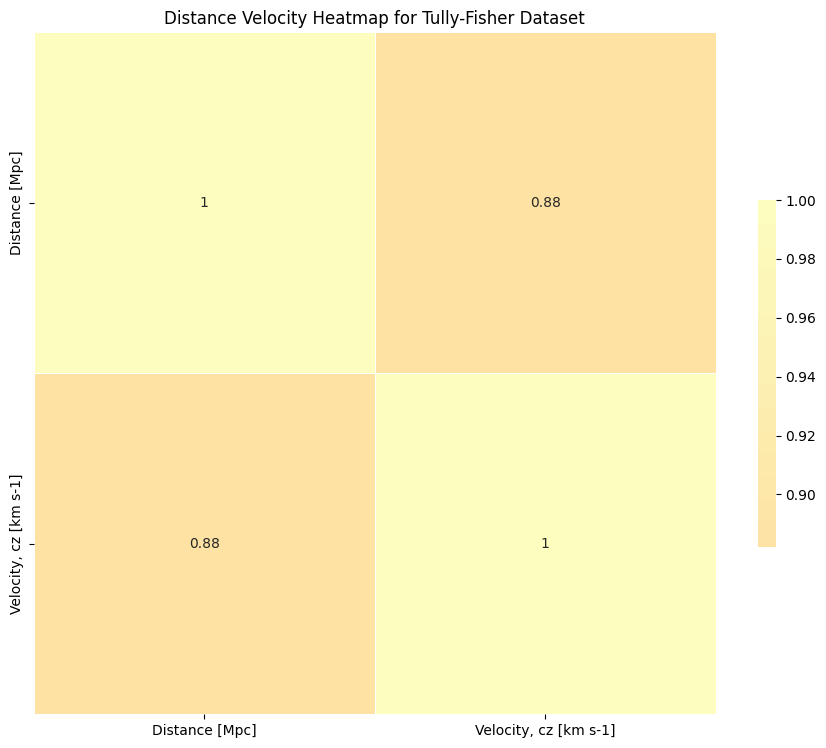

In [1159]:
snia_corr = celestial_data_Tully_Fisher[['Distance [Mpc]', 'Velocity, cz [km s-1]']].corr()

f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(snia_corr, cmap='magma', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Distance Velocity Heatmap for Tully-Fisher Dataset')
plt.show()

As expected, Tully-Fisher has a weaker velocity - distance correlation making it less suitable as training data for a linear regression model.
<br><br>
The Tully-Fisher method presents as inferior data in studying Hubble's law because the fit between velocity and distance is markedly less linear.



In [1160]:
celestial_data_SNIa.describe()

,Distance [Mpc],Sta. Desv. [Mpc],"Velocity, cz [km s-1]",Uncert. [km s-1],Calculated H0 [km s -1 MPc -1]
count,93.000000,5.000000,93.000000,12.00000,93.000000
mean,822.972043,3.114000,65188.612903,123.16750,78.181012
std,288.306285,0.635043,24337.983547,48.63601,3.981614
min,89.000000,2.120000,6295.640000,29.98000,64.436591
25%,692.000000,2.830000,53063.270000,125.91500,75.908990
50%,887.000000,3.540000,67753.100000,149.90000,78.691173
75%,1040.000000,3.540000,83642.100000,149.90000,81.170226
max,1190.000000,3.540000,98931.510000,149.90000,89.266867


In [1161]:
celestial_data_Tully_Fisher.describe()

,Distance [Mpc],Sta. Desv. [Mpc],"Velocity, cz [km s-1]",Uncert. [km s-1],Calculated H0 [km s -1 MPc -1]
count,7.000000,1.00,7.000000,6.000000,7.000000
mean,143.095714,0.58,11387.615714,29.280000,79.484647
std,30.556791,NaN,2699.337683,11.782176,9.566979
min,110.000000,0.58,7794.600000,12.890000,70.695481
25%,130.335000,0.58,9409.885000,20.987500,71.383023
50%,135.000000,0.58,12016.880000,31.930000,76.274734
75%,144.500000,0.58,12646.595000,36.122500,85.609975
max,207.000000,0.58,15788.870000,44.070000,95.436318


For SNIa data set the mean calculated value of $H_0$ is closer to the expected theoretical value.

For curiosity's sake let's apply a linear regression model for $v$ as a function of $d$ using Tully-Fisher data set

In [1162]:
X = celestial_data_Tully_Fisher['Distance [Mpc]'].values.reshape(-1,1)
y = celestial_data_Tully_Fisher['Velocity, cz [km s-1]'].values.reshape(-1,1)
hubble_model_tully_fisher = LinearRegression()
hubble_model_tully_fisher.fit(X,y)

LinearRegression()

In [1163]:
print('Regression coefficient R^2: ')
print(hubble_model_tully_fisher.score(X,y))
print('Slope as Hubble\'s constant [(km/s)/Mpc]')
print(hubble_model_tully_fisher.coef_)
print('Intercept (c)')
print(hubble_model_tully_fisher.intercept_)

Regression coefficient R^2: 
0.7784586266203242
Slope as Hubble's constant [(km/s)/Mpc]
[[77.94122817]]
Intercept (c)
[234.5599969]


The regression coefficient of 0.778 suggests that the model is not strongly linear, which we have visually confirmed.
Although, the slope value for Hubble's constant of 77.9 km/s/Mpc is still drastically higher than the theoretical predicted value.

Lets create a linear regression model for $v$ as a function of $d$ using the SNIa set

In [1164]:
#Format data for input into linear regression fit
X = celestial_data_SNIa['Distance [Mpc]'].values.reshape(-1,1)
y = celestial_data_SNIa['Velocity, cz [km s-1]'].values.reshape(-1,1)
#Create and fit linear regression
hubble_model_SNIA = LinearRegression()
hubble_model_SNIA.fit(X,y)

LinearRegression()

In [1165]:
print('Regression coefficient R^2: ')
print(hubble_model_SNIA.score(X,y))
print('Slope as Hubble\'s constant [(km/s)/Mpc]')
print(hubble_model_SNIA.coef_)
print('Intercept (c)')
print(hubble_model_SNIA.intercept_)

Regression coefficient R^2: 
0.9877665650358689
Slope as Hubble's constant [(km/s)/Mpc]
[[83.89916604]]
Intercept (c)
[-3858.05517746]


Our value of Hubble's constant is quite largely above the accepted literature value. This can be attributed the cosmic dust effect.
<br><br>
For an alternative set of training data, let's utilize training data for distance less than 500 Mpc.

In [1166]:
#Filter the data for low distances
filtered_celestial_df_SNIa = celestial_data_SNIa[celestial_data_SNIa['Distance [Mpc]'] < 500]
#Format data for input into linear regression fit
X = filtered_celestial_df_SNIa['Distance [Mpc]'].values.reshape(-1,1)
y = filtered_celestial_df_SNIa['Velocity, cz [km s-1]'].values.reshape(-1,1)
#Create and fit linear regression
hubble_model_half_SNIA = LinearRegression()
hubble_model_half_SNIA.fit(X,y)

LinearRegression()

Let's briefly inspect the short distance data

In [1167]:
filtered_celestial_df_SNIa.describe()

,Distance [Mpc],Sta. Desv. [Mpc],"Velocity, cz [km s-1]",Uncert. [km s-1],Calculated H0 [km s -1 MPc -1]
count,11.000000,0.0,11.000000,0.0,11.000000
mean,218.400000,NaN,15807.238182,NaN,71.822963
std,116.798801,NaN,8685.801636,NaN,1.173925
min,89.000000,NaN,6295.640000,NaN,70.539412
25%,108.000000,NaN,7644.705000,NaN,70.765222
50%,176.000000,NaN,12591.280000,NaN,71.541364
75%,301.000000,NaN,21884.850000,NaN,72.706747
max,415.000000,NaN,30578.830000,NaN,73.683928


In [1168]:
filtered_celestial_df_SNIa['Calculated H0 [km s -1 MPc -1]'].median()

71.54136363636364

In [1169]:
print('Regression coefficient R^2: ')
print(hubble_model_half_SNIA.score(X,y))
print('Slope as Hubble\'s constant [(km/s)/Mpc]')
print(hubble_model_half_SNIA.coef_)
print('Intercept (c)')
print(hubble_model_half_SNIA.intercept_)

Regression coefficient R^2: 
0.9998473350550157
Slope as Hubble's constant [(km/s)/Mpc]
[[74.35982648]]
Intercept (c)
[-432.94792066]


The attained value of Hubble's constant as 74.36 km/s/Mpc is the best value we have seen so far.

For completeness we will check H0 for the large distance data set

In [1170]:
filtered_celestial_df_distant_SNIa = celestial_data_SNIa[celestial_data_SNIa['Distance [Mpc]'] > 500]
filtered_celestial_df_distant_SNIa.describe()


,Distance [Mpc],Sta. Desv. [Mpc],"Velocity, cz [km s-1]",Uncert. [km s-1],Calculated H0 [km s -1 MPc -1]
count,82.000000,5.000000,82.000000,12.00000,82.000000
mean,904.073171,3.114000,71812.943659,123.16750,79.033920
std,190.863553,0.635043,16967.138629,48.63601,3.407316
min,502.000000,2.120000,37474.060000,29.98000,64.436591
25%,779.000000,2.830000,60558.080000,125.91500,77.224973
50%,922.000000,3.540000,72549.770000,149.90000,79.376116
75%,1057.500000,3.540000,84766.320000,149.90000,81.268887
max,1190.000000,3.540000,98931.510000,149.90000,89.266867


<h3>Comparing SNIa model with experimental data</h3>

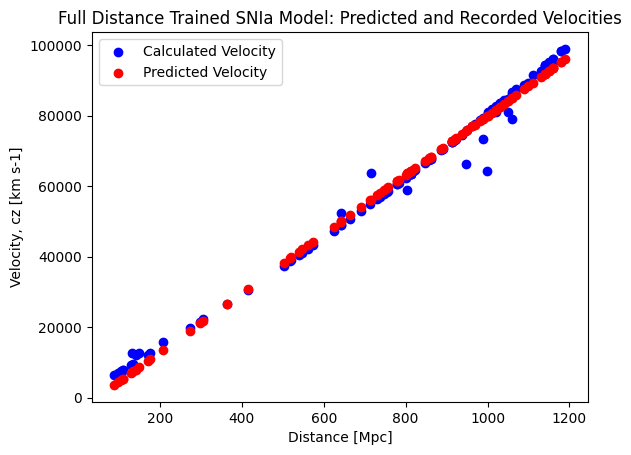

In [1171]:
#Calculate and assign the H0 Field
celestial_data['Calculated H0 [km s -1 MPc -1]'] = celestial_data['Velocity, cz [km s-1]'] / celestial_data['Distance [Mpc]']
predicted_velocity = hubble_model_SNIA.predict(celestial_data['Distance [Mpc]'].values.reshape(-1,1))
celestial_data['Predicted velocity [km s - 1]'] = predicted_velocity

#Create a scatter plot
plt.scatter(celestial_data['Distance [Mpc]'], celestial_data['Velocity, cz [km s-1]'], label='Calculated Velocity', color='b')  # Blue points for the Calculated H0 values
plt.scatter(celestial_data['Distance [Mpc]'], celestial_data['Predicted velocity [km s - 1]'], label='Predicted Velocity', color='r')  # Red points for the Predicted H0 values

# Add labels and title
plt.title('Full Distance Trained SNIa Model: Predicted and Recorded Velocities')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity, cz [km s-1]')
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


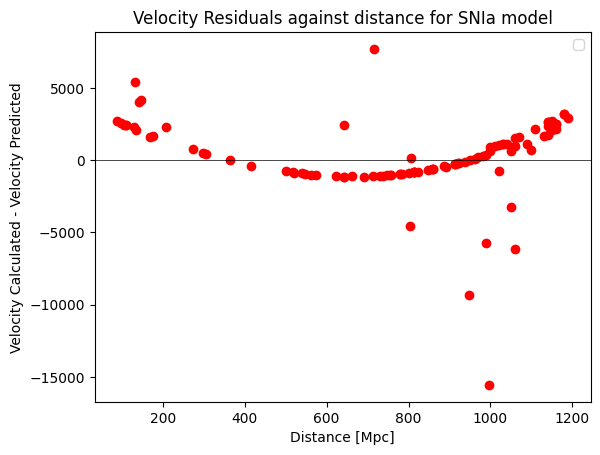

In [1172]:
#Calculate residuals
velocity_residuals = celestial_data['Velocity, cz [km s-1]']-celestial_data['Predicted velocity [km s - 1]']

#Create a scatter
plt.scatter(celestial_data['Distance [Mpc]'], velocity_residuals, color='r') 

# Add labels and title
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Add a thin black line at y=0
plt.title('Velocity Residuals against distance for SNIa model')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity Calculated - Velocity Predicted')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


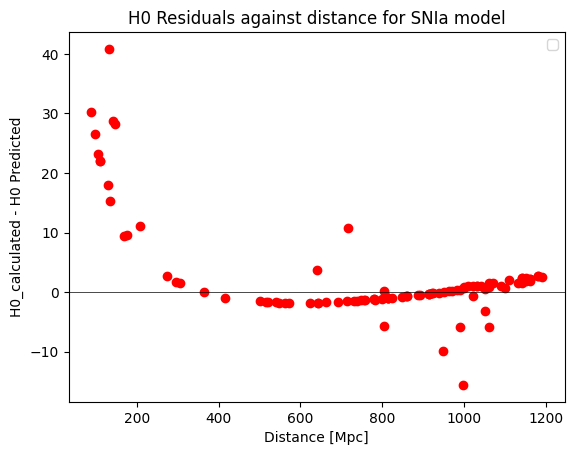

In [1173]:
#Calculate the predicted H0 field
celestial_data['Predicted H0 [km s - 1 Mpc -1]'] = celestial_data['Predicted velocity [km s - 1]']/celestial_data['Distance [Mpc]']
celestial_data['Calculated H0 [km s -1 MPc -1]'] = celestial_data['Velocity, cz [km s-1]'] / celestial_data['Distance [Mpc]']
#Let's exmaine the difference between the calculated and predicted values of H0 from velocity data
calculated_h0 = celestial_data['Calculated H0 [km s -1 MPc -1]']
predictedh0 = celestial_data['Predicted H0 [km s - 1 Mpc -1]']
h0_difference = (calculated_h0-predictedh0)

#Create a scatter plot
plt.scatter(celestial_data['Distance [Mpc]'], h0_difference, color='r')  # Blue points for the Calculated H0 values
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Add a thin black line at y=0
#Add labels and title
plt.title('H0 Residuals against distance for SNIa model')
plt.xlabel('Distance [Mpc]')
plt.ylabel('H0_calculated - H0 Predicted')
plt.legend()

# Show the plot
plt.show()

The velocity residuals graph resembles a quadratic as a function of distance, it may be worth doing a quick fit.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


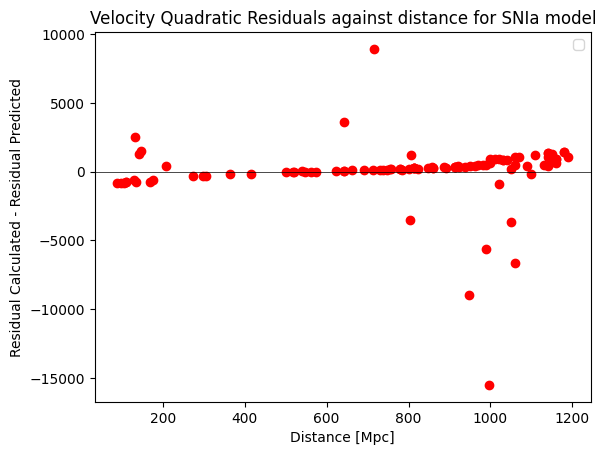

In [1174]:
#Fit the data to a quadratic function

coefficients = np.polyfit(celestial_data['Distance [Mpc]'],velocity_residuals , 2)
quadratic_fit = np.poly1d(coefficients)
y_fit = quadratic_fit(celestial_data['Distance [Mpc]'])

quadratic_velocity_residuals = velocity_residuals - y_fit
plt.scatter(celestial_data['Distance [Mpc]'], quadratic_velocity_residuals, color='r') 
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Add a thin black line at y=0
plt.title('Velocity Quadratic Residuals against distance for SNIa model')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Residual Calculated - Residual Predicted')
plt.legend()
# Show the plot
plt.show()

Taking a look at some of the new records we have generated

In [1175]:
celestial_data.describe()

,Distance [Mpc],Sta. Desv. [Mpc],"Velocity, cz [km s-1]",Uncert. [km s-1],Calculated H0 [km s -1 MPc -1],Predicted velocity [km s - 1],Predicted H0 [km s - 1 Mpc -1]
count,100.000000,6.000000,100.000000,18.000000,100.000000,100.000000,100.000000
mean,775.380700,2.691667,61422.543100,91.871667,78.272266,61195.738914,75.676884
std,328.169375,1.180177,27225.631533,60.378037,4.515657,27533.136914,9.156217
min,89.000000,0.580000,6295.640000,12.890000,64.436591,3608.970600,40.550231
25%,611.250000,2.297500,46317.935000,34.627500,75.309090,47425.310063,77.578810
50%,852.000000,3.185000,65414.715000,101.930000,78.691173,67624.034286,79.370776
75%,1030.000000,3.540000,82068.185000,149.900000,81.205922,82558.085841,80.153481
max,1190.000000,3.540000,98931.510000,149.900000,95.436318,95981.952407,80.657103


In [1176]:
# Calculate the mean for experimental H0
mean_h0_calculated = celestial_data['Calculated H0 [km s -1 MPc -1]'].mean()
# Calculate the mean predicted H0
mean_h0_predicted = celestial_data['Predicted H0 [km s - 1 Mpc -1]'].mean()
# Display the results
print(f"Mean Calculated H0: {mean_h0_calculated}")
print(f"Mean Predicted H0: {mean_h0_predicted}")

Mean Calculated H0: 78.27226601452521
Mean Predicted H0: 75.67688428994694


<h3>Comparing Low distances SNIa model with experimental data</h3>

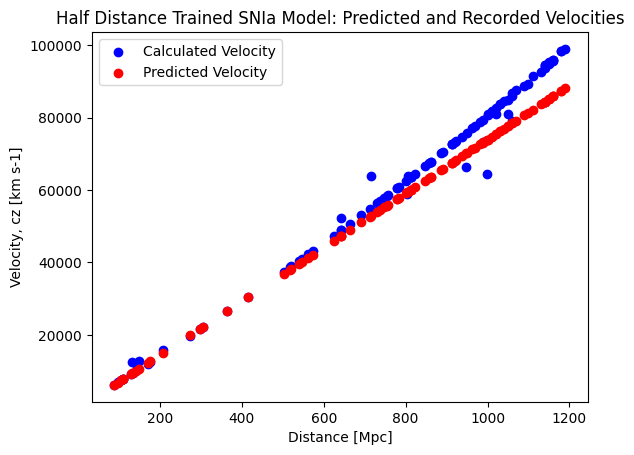

In [1177]:
#Reassign the predicted field using the half distance linear regression model
predicted_velocity = hubble_model_half_SNIA.predict(celestial_data['Distance [Mpc]'].values.reshape(-1,1))
celestial_data['Predicted velocity [km s - 1]'] = predicted_velocity
celestial_data['Predicted H0 [km s - 1 Mpc -1]'] = celestial_data['Predicted velocity [km s - 1]']/celestial_data['Distance [Mpc]']
celestial_data['Calculated H0 [km s -1 MPc -1]'] = celestial_data['Velocity, cz [km s-1]'] / celestial_data['Distance [Mpc]']
# Create a scatter plot
plt.scatter(celestial_data['Distance [Mpc]'], celestial_data['Velocity, cz [km s-1]'], label='Calculated Velocity', color='b')  # Blue points for the Calculated H0 values
plt.scatter(celestial_data['Distance [Mpc]'], celestial_data['Predicted velocity [km s - 1]'], label='Predicted Velocity', color='r')  # Red points for the Predicted H0 values
# Add labels and title
plt.title('Half Distance Trained SNIa Model: Predicted and Recorded Velocities')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity, cz [km s-1]')
plt.legend()
# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


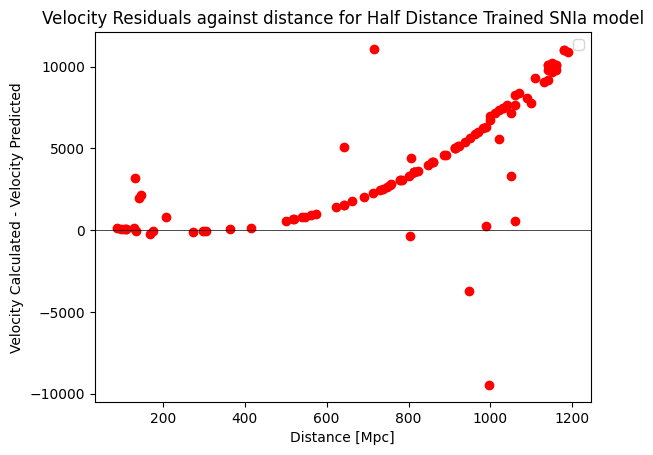

In [1178]:
velocity_residuals = celestial_data['Velocity, cz [km s-1]']-celestial_data['Predicted velocity [km s - 1]']
plt.scatter(celestial_data['Distance [Mpc]'], velocity_residuals, color='r') 

# Create a scatter
# Add labels and title
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Add a thin black line at y=0
plt.title('Velocity Residuals against distance for Half Distance Trained SNIa model')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity Calculated - Velocity Predicted')
plt.legend()
# Show the plot
plt.show()

As expected we see the fit holds very strongly for distance values less than 600 Mpc, thought there are some glaring outliers at ultra low distances (less than 150 Mpc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


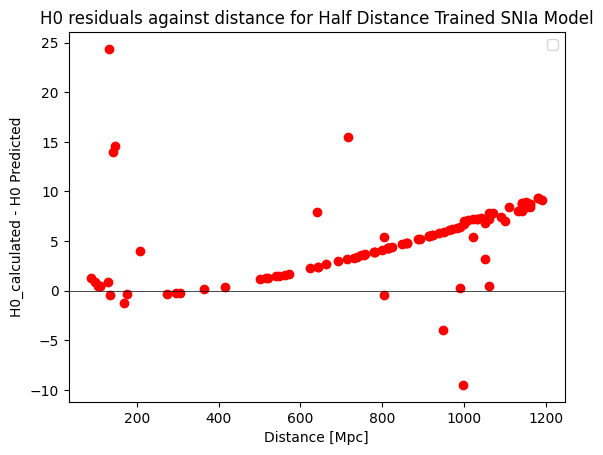

In [1179]:
#Let's exmaine the difference between the calculated and predicted values of H0 from velocity data
calculated_h0 = celestial_data['Calculated H0 [km s -1 MPc -1]']
predictedh0 = celestial_data['Predicted H0 [km s - 1 Mpc -1]']
h0_difference = (calculated_h0-predictedh0)

# Create a scatter plot
plt.scatter(celestial_data['Distance [Mpc]'], h0_difference, color='r')  # Blue points for the Calculated H0 values

# Add labels and title
plt.title('H0 residuals against distance for Half Distance Trained SNIa Model')
plt.xlabel('Distance [Mpc]')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Add a thin black line at y=0

plt.ylabel('H0_calculated - H0 Predicted')
plt.xlabel('Distance [Mpc]')
plt.ylabel('H0_calculated - H0 Predicted')
plt.legend()

# Show the plot
plt.show()

We can see some disagreements in H0 clustered around low distances.
<br><br>
This can be attributed to the fact that at low distances, the effect of cosmic expansion on objects is less signifcant compared to translational velocity of the object. 
<br><br>
There is also a linear structure in the graph which demonstrates that a particular source of error is proportional to distance. This may be explained by cosmic dust.
<br><br>


In [1180]:
# Calculate the mean and standard error on the mean for half SNIa model predicted H0
mean_h0_predicted_SNIa_low_distance = celestial_data['Predicted H0 [km s - 1 Mpc -1]'].mean()
standard_devoatopm_h0_predicted_SNIa_low_distance = statistics.stdev(celestial_data['Predicted H0 [km s - 1 Mpc -1]'])
# Display the results
print(f"Mean Predicted H0: {mean_h0_predicted_SNIa_low_distance}")


Mean Predicted H0: 73.43712847926871


<h3>Part b</h3>

 The file Ex1_Hubble2.csv contains a subset of estimates of Hubble’s constant reported between 1995 and 2010.
 <br><br>
Use statistical measures of location and variability, along with suitable visualisation plots, to compare these results to the values for Hubble’s constant which you have determined in part a). Clearly justify why you have chosen the descriptive statistics used and critically assess the models fitted in part a), comparing them to the “ideal” value of Hubble’s constant suggested by the collected dataset. 

Before we begin comparison between the calculated value of h0 and the data presented in Ex1_Hubble2.csv (Hubble 2), lets perform some preliminary analysis of Hubble 2.

In [1181]:
h0_experimental_data

,H0 [km s-1 Mpc-1],errors (+),errors (-),Date,Type,Source (Date = preprint or pub or appearance at conference)
0,72,7,-7,2004.550,AK,"Freedman, W. \& Turner, M. 2004, in {\it Measu..."
1,67,4,-4,2003.055,S,"Hoeflich, P., Gerardy, C., Linder, E. \& Mario..."
2,56,6,-6,1999.322,OS,"Tammann, G., Sandage, A. \& Reindl, B. 1999, i..."
3,68,5,-5,1998.370,A,"Nevalainen & Roos, M. 1998, Preprint. A&A in p..."
4,74,5,-5,2006.250,S,"Ngeow, C. \& Kanbur, 2006, ApJL 642, L29. Astr..."
...,...,...,...,...,...,...
93,92,12,-12,1997.150,O,"Bizyaev, D. Astronom. Zhurnal 74, 172 (1997) S..."
94,80,17,-17,1995.791,TK,"Kennicutt, Freedman \& Mould, 1995, AJ 110, 1476"
95,60,10,-10,1996.480,A,"Gouguemheim, L. \etal 1996, Rev Mod Astr 9, 127."
96,60,3,-3,1996.379,SS,"Saha, A. 1997, in CDS, Livio \etal eds (Cambri..."


Note the Type Columnm. Perhaps some 'Types' of experiment are superior i.e. offer greater accuracy and or precision.

In [1182]:
h0_experimental_data.describe()

,H0 [km s-1 Mpc-1],errors (+),errors (-),Date
count,98.000000,98.000000,98.000000,98.000000
mean,66.285714,8.469388,-8.081633,2000.132551
std,11.237823,5.066982,4.489790,3.105873
min,42.000000,2.000000,-24.000000,1995.250000
25%,58.000000,5.000000,-10.000000,1997.432250
50%,66.500000,7.000000,-7.000000,1999.529000
75%,73.000000,10.750000,-5.000000,2002.188250
max,98.000000,29.000000,-2.000000,2008.833000


In [1183]:
h0_experimental_data['H0 [km s-1 Mpc-1]'].median()

66.5

Text(0.5, 1.0, 'Hubble 2 plot')

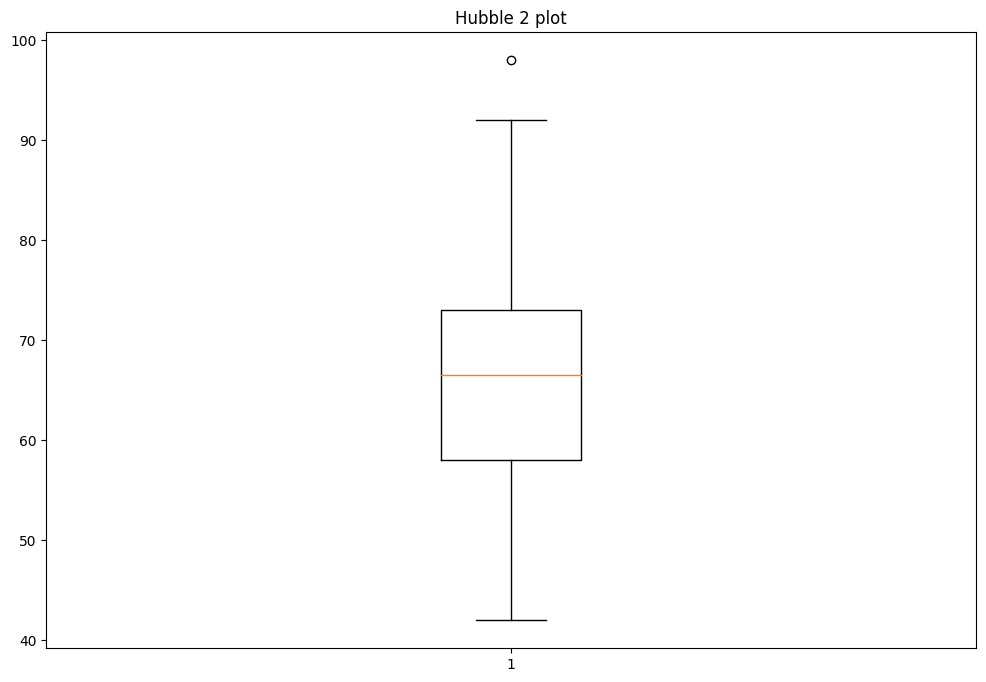

In [1184]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(h0_experimental_data['H0 [km s-1 Mpc-1]'])
ax.set_title('Hubble 2 plot')

Calculating the mean value of H

In [1185]:
h0_values = h0_experimental_data['H0 [km s-1 Mpc-1]']
#Only need error magnitude, so will take the +ve column
h0_errors = h0_experimental_data['errors (+)']
print(f"The mean value of H0 is {h0_values.mean()} km/s/Mpc")

The mean value of H0 is 66.28571428571429 km/s/Mpc


Separating the experimental data into the different types.

In [1186]:
#Instantiate a dictionary to hold each type
dfs = {}

# Iterate over unique values in the 'Type' column and create separate DataFrames
for t in h0_experimental_data['Type'].unique():
#Implement dictionary element containing only records with the current unique type
    dfs[t] = h0_experimental_data[h0_experimental_data['Type'] == t]


# Initialize dictionaries to store average values and errors
avg_values = {}
upper_quartile = {}
avg_errors_plus = {}
avg_errors_minus = {}
upper_quartiles = {}
lower_quartiles = {}

# Calculate the average value and error for each DataFrame
for t, data in dfs.items():
    avg_values[t] = data['H0 [km s-1 Mpc-1]'].mean()
    avg_errors_plus[t] = (data['errors (+)'].abs().mean()) 
    avg_errors_minus[t] = (data['errors (-)'].abs().mean()) 
    upper_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.75)
    lower_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.25)





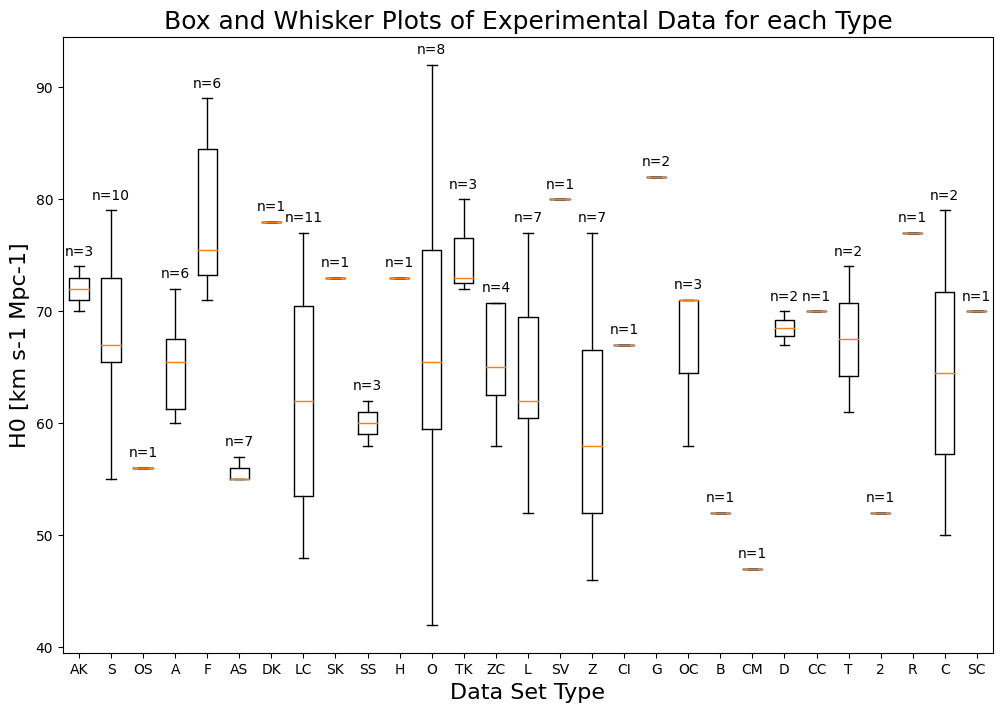

In [1187]:
import matplotlib.pyplot as plt

#Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

#Initialize the position variable
pos = 1

#Create a box and whisker plot for each DataFrame
for t, data in dfs.items():
    num_items = len(data)
    box = ax.boxplot(data['H0 [km s-1 Mpc-1]'], positions=[pos], labels=[t], widths=0.6, showfliers=False)
    ax.text(pos, box['caps'][1].get_ydata()[0] + 1, f'n={num_items}', ha='center', fontsize=10)
    pos += 1

#Set the title and labels
ax.set_title('Box and Whisker Plots of Experimental Data for each Type', fontsize=18)
ax.set_xlabel('Data Set Type', fontsize=16)
ax.set_ylabel('H0 [km s-1 Mpc-1]', fontsize=16)

#Show the plot
plt.show()

Based on theoretical calculations, the expectation value of $H$ is ~ 68(km/s)/Mpc. <br>
According to https://news.uchicago.edu/explainer/hubble-constant-explained the most recent precise measurements suggest a Hubble constant between 69.8(km/s)/MPc and 74(km/s)/MPc.
<br><br>
Immediately we can see some of these experiment types produce unsuitable data. I will filter those types whith a sample size of 1 or less.

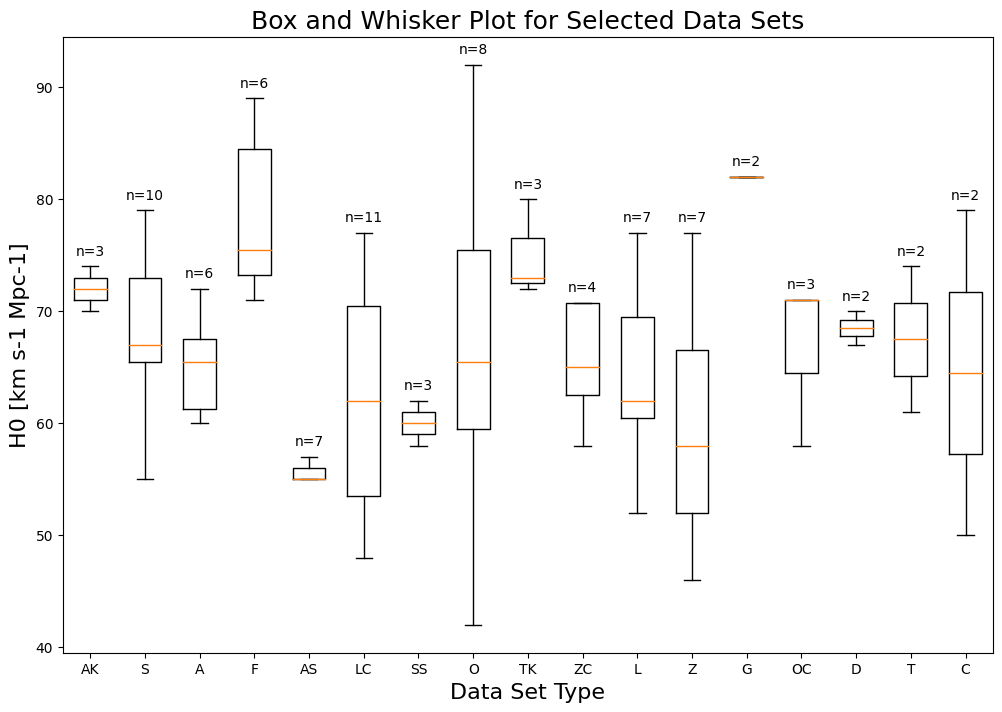

In [1188]:
#Modifying the dictionary 
dfs_filtered = {key: value for key, value in dfs.items() if (len(value) > 1)}

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the position variable
pos = 1

# Create a box and whisker plot for each DataFrame in the filtered dictionary
for t, data in dfs_filtered.items():
    num_items = len(data)
    box = ax.boxplot(data['H0 [km s-1 Mpc-1]'], positions=[pos], labels=[t], widths=0.6, showfliers=False)
    ax.text(pos, box['caps'][1].get_ydata()[0] + 1, f'n={num_items}', ha='center', fontsize=10)
    pos += 1

# Set the title and labels
ax.set_title('Box and Whisker Plot for Selected Data Sets', fontsize=18)
ax.set_xlabel('Data Set Type', fontsize=16)
ax.set_ylabel('H0 [km s-1 Mpc-1]', fontsize=16)

# Show the plot
plt.show()

The most accurate datasets remaining are those gathered by AK type and D type. Although the sample sizes are small, all recorded values for these methods are within the expected literature values.<br><br>
Lets see if we can extract a value and error of H for these Data.

In [1189]:
# Let's the dictionaries to include only 'AK' and 'D' data types
filtered_dfs = {key: value for key, value in dfs.items() if key in ['AK', 'D']}

# Combine the 'H0 [km s-1 Mpc-1]' values into a single list
combined_values = np.concatenate([value['H0 [km s-1 Mpc-1]'].values for value in filtered_dfs.values()])

# Calculate the combined mean and error
combined_mean = np.mean(combined_values)
combined_error = np.std(combined_values)

# Print the combined mean and error
print(f"Combined Mean H0: {combined_mean:.2f}")
print(f"Combined Error: {combined_error:.2f}")


Combined Mean H0: 70.60
Combined Error: 2.33


This is the first value of H for which the mean and the error are confined within the accepted literature bounds.

In [1190]:
# Filtering for data types of moderate range
filtered_dfs = {key: value for key, value in dfs.items() if key in ['AK','TK','OC','D','T']}

# Combine the 'H0 [km s-1 Mpc-1]' values into a single list
combined_values = np.concatenate([value['H0 [km s-1 Mpc-1]'].values for value in filtered_dfs.values()])

# Calculate the combined mean and error
combined_mean = np.mean(combined_values)
combined_error = np.std(combined_values)

# Print the combined mean and error
print(f"Combined Mean H0: {combined_mean:.2f}")
print(f"Combined Error: {combined_error:.2f}")



Combined Mean H0: 70.23
Combined Error: 5.44


Hubble 2 Unmodified Data:

Within the hubble 2 data set, it may be worth investigating how the literature H0 value varies with the year.

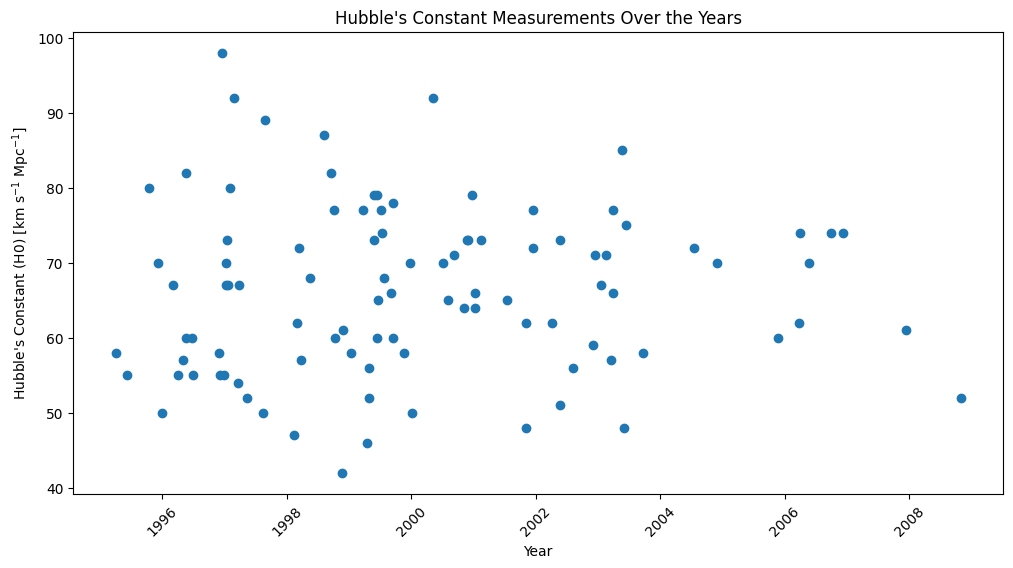

In [1191]:
import matplotlib.pyplot as plt

#Extract the required data from the DataFrame
years = h0_experimental_data['Date']
hubble_values = h0_experimental_data['H0 [km s-1 Mpc-1]']

# Plot the graph
plt.figure(figsize=(12, 6))  
plt.scatter(years, hubble_values)


# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Hubble\'s Constant (H0) [km s$^{-1}$ Mpc$^{-1}$]')
plt.title('Hubble\'s Constant Measurements Over the Years')
plt.xticks(rotation=45)  #Rotate the x-axis labels for better visibility

# Display the plot
plt.show()

As time goes by there appeears to be fewer measurments of Hubble's constant

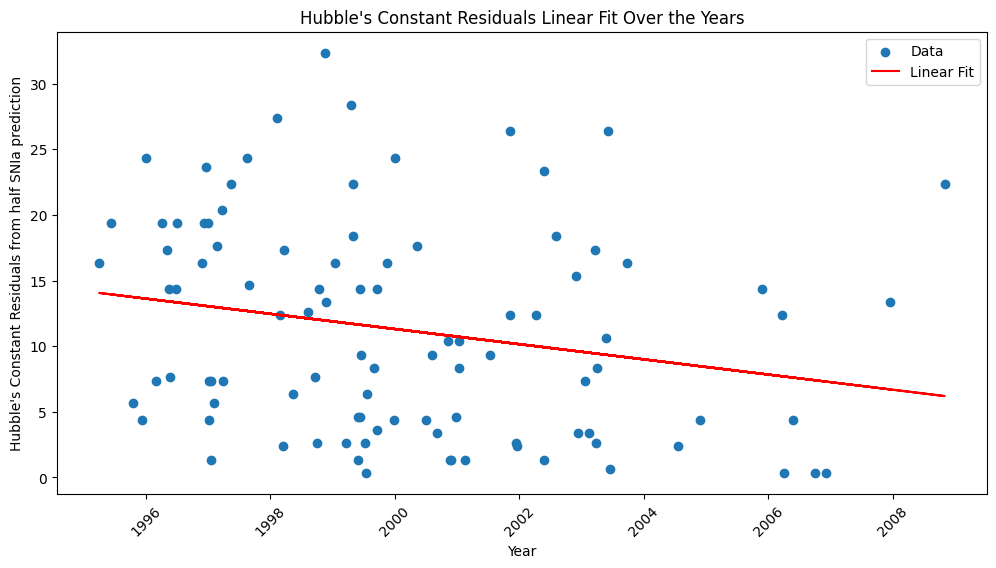

In [1192]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the required data from the DataFrame
years = h0_experimental_data['Date']
hubble_residuals = abs(h0_experimental_data['H0 [km s-1 Mpc-1]'] - 74.35982648)

# Perform linear fit
coefficients = np.polyfit(years, hubble_residuals, 1)
poly = np.poly1d(coefficients)
linear_fit = poly(years)

# Plot the graph with linear fit
plt.figure(figsize=(12, 6))  # Adjust the size of the figure as needed
plt.scatter(years, hubble_residuals, label='Data')
plt.plot(years, linear_fit, label='Linear Fit', color='r')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Hubble\'s Constant Residuals from half SNIa prediction')
plt.title('Hubble\'s Constant Residuals Linear Fit Over the Years')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.legend()  # Display the legend

# Display the plot
plt.show()

Applying a simple numpy lineare fit to act as a line of best fit, we can see that the error of the experimental value of $H_0$ decreases with time. Lets create a modern data set that only uses values past the year 2000

In [1193]:
h_0_modern_experimental_data = h0_experimental_data[h0_experimental_data['Date'] >= 2001]
h_0_old_experimental_data = h0_experimental_data[h0_experimental_data['Date'] <= 2001]

Creating a scatter plot for the modern data (post 2001).

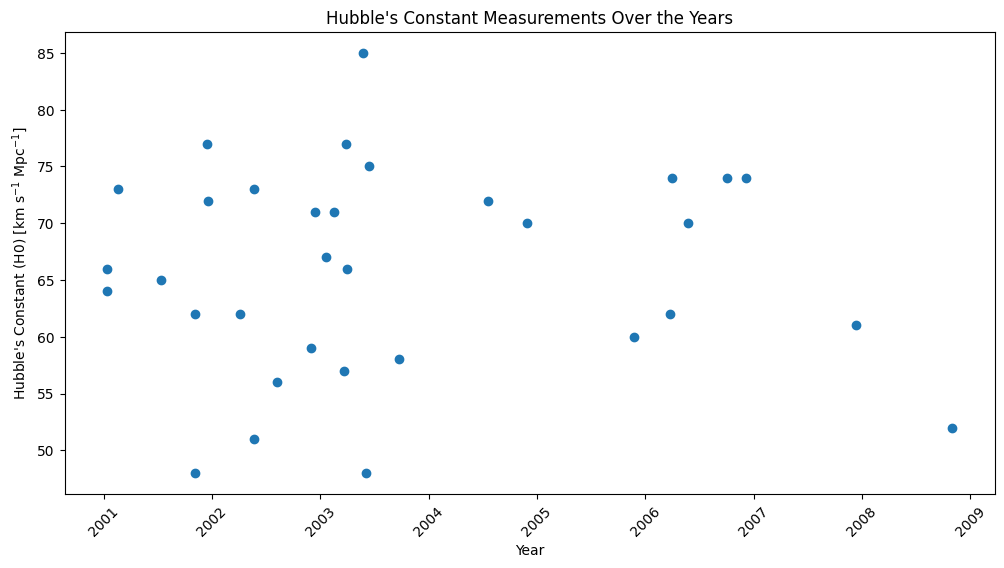

In [1194]:
import matplotlib.pyplot as plt

# Extract the required data from the DataFrame
years = h_0_modern_experimental_data['Date']
hubble_values = h_0_modern_experimental_data['H0 [km s-1 Mpc-1]']

# Plot the graph
plt.figure(figsize=(12, 6))  # Adjust the size of the figure as needed
plt.scatter(years, hubble_values)


# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Hubble\'s Constant (H0) [km s$^{-1}$ Mpc$^{-1}$]')
plt.title('Hubble\'s Constant Measurements Over the Years')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

# Display the plot
plt.show()

In [1195]:
h_0_modern_experimental_data.describe()

,H0 [km s-1 Mpc-1],errors (+),errors (-),Date
count,33.000000,33.000000,33.000000,33.000000
mean,65.818182,6.939394,-6.333333,2003.709061
std,9.022384,4.422523,3.837860,2.086599
min,48.000000,2.000000,-20.000000,2001.029000
25%,60.000000,4.000000,-7.000000,2002.263000
50%,66.000000,6.000000,-6.000000,2003.215000
75%,73.000000,7.000000,-4.000000,2004.910000
max,85.000000,20.000000,-2.000000,2008.833000


Creating another box and whisker plot to examine those modern experimental types.

In [1196]:
#Instantiate a dictionary to hold each type
dfs = {}

# Iterate over unique values in the 'Type' column and create separate DataFrames
for t in h_0_modern_experimental_data['Type'].unique():
    #Implement dictionary element containing only records with the current unique type
    dfs[t] = h_0_modern_experimental_data[h_0_modern_experimental_data['Type'] == t]

# Initialize dictionaries to store average values and errors
avg_values = {}
upper_quartile = {}
avg_errors_plus = {}
avg_errors_minus = {}
upper_quartiles = {}
lower_quartiles = {}

# Calculate the average value and error for each DataFrame
for t, data in dfs.items():
    avg_values[t] = data['H0 [km s-1 Mpc-1]'].mean()
    avg_errors_plus[t] = (data['errors (+)'].abs().mean()) 
    avg_errors_minus[t] = (data['errors (-)'].abs().mean()) 
    upper_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.75)
    lower_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.25)





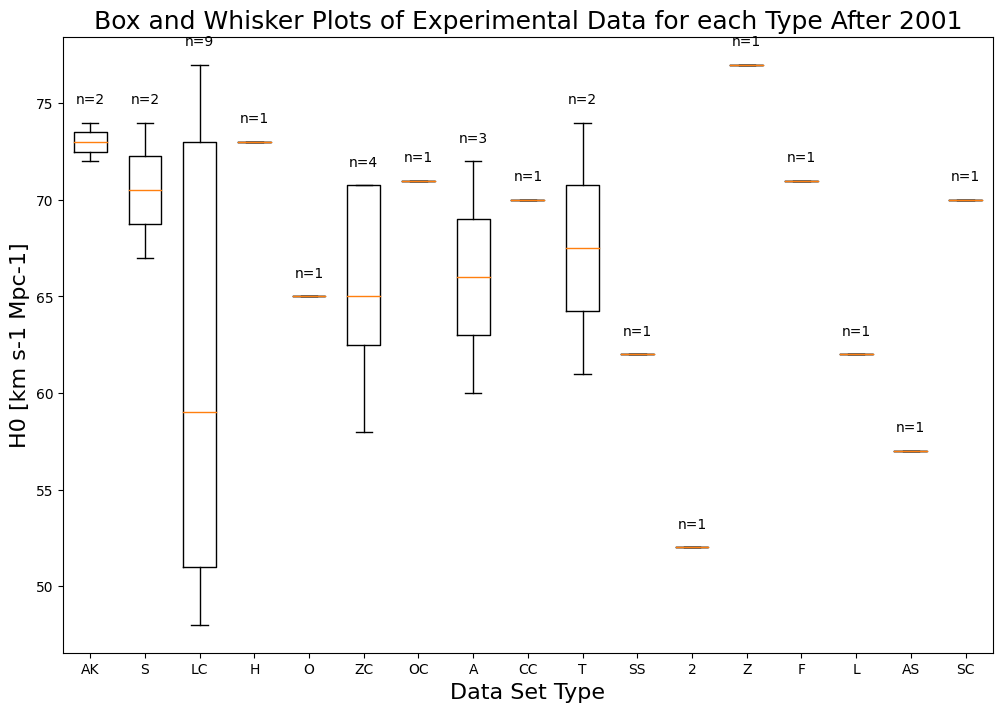

In [1197]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the position variable
pos = 1

# Create a box and whisker plot for each DataFrame
for t, data in dfs.items():
    num_items = len(data)
    box = ax.boxplot(data['H0 [km s-1 Mpc-1]'], positions=[pos], labels=[t], widths=0.6, showfliers=False)
    ax.text(pos, box['caps'][1].get_ydata()[0] + 1, f'n={num_items}', ha='center', fontsize=10)
    pos += 1

# Set the title and labels
ax.set_title('Box and Whisker Plots of Experimental Data for each Type After 2001', fontsize=18)
ax.set_xlabel('Data Set Type', fontsize=16)
ax.set_ylabel('H0 [km s-1 Mpc-1]', fontsize=16)

# Show the plot
plt.show()

For completion, creating another box plot to display exclusively old types.

In [1198]:
#Instantiate a dictionary to hold each type
dfs = {}

# Iterate over unique values in the 'Type' column and create separate DataFrames
for t in h_0_old_experimental_data['Type'].unique():
    #Implement dictionary element containing only records with the current unique type
    dfs[t] = h_0_old_experimental_data[h_0_old_experimental_data['Type'] == t]

# Initialize dictionaries to store average values and errors
avg_values = {}
upper_quartile = {}
avg_errors_plus = {}
avg_errors_minus = {}
upper_quartiles = {}
lower_quartiles = {}

# Calculate the average value and error for each DataFrame
for t, data in dfs.items():
    avg_values[t] = data['H0 [km s-1 Mpc-1]'].mean()
    avg_errors_plus[t] = (data['errors (+)'].abs().mean()) 
    avg_errors_minus[t] = (data['errors (-)'].abs().mean()) 
    upper_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.75)
    lower_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.25)

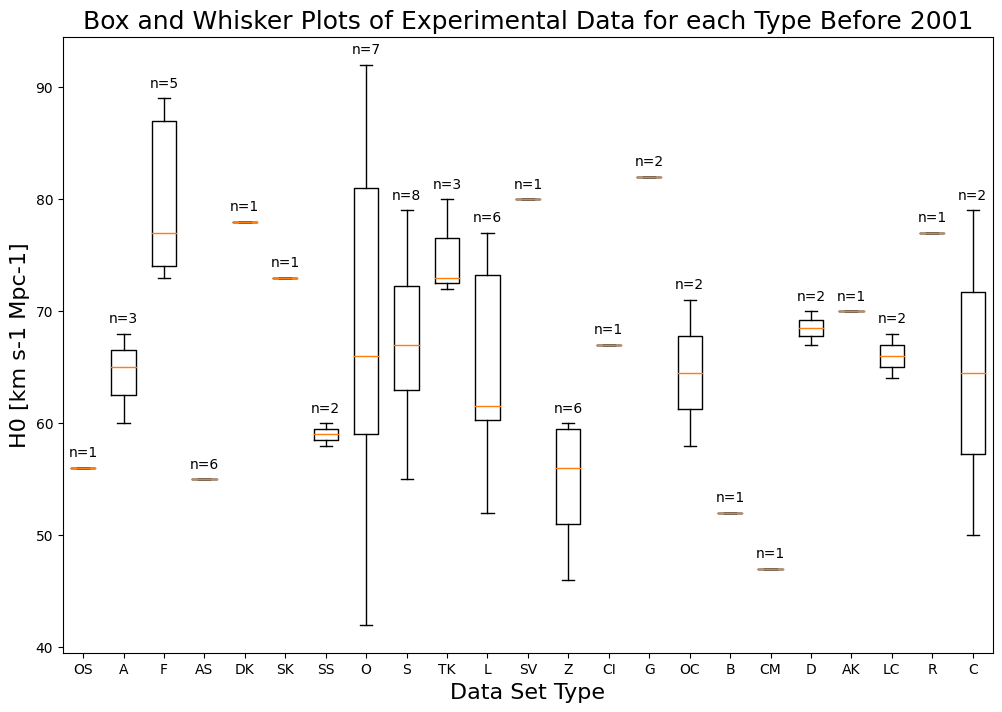

In [1199]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the position variable
pos = 1

# Create a box and whisker plot for each DataFrame
for t, data in dfs.items():
    num_items = len(data)
    box = ax.boxplot(data['H0 [km s-1 Mpc-1]'], positions=[pos], labels=[t], widths=0.6, showfliers=False)
    ax.text(pos, box['caps'][1].get_ydata()[0] + 1, f'n={num_items}', ha='center', fontsize=10)
    pos += 1

# Set the title and labels
ax.set_title('Box and Whisker Plots of Experimental Data for each Type Before 2001', fontsize=18)
ax.set_xlabel('Data Set Type', fontsize=16)
ax.set_ylabel('H0 [km s-1 Mpc-1]', fontsize=16)

# Show the plot
plt.show()

In [1200]:
celestial_full_data = celestial_data_SNIa['Calculated H0 [km s -1 MPc -1]']
celestial_h0_data_low_distance = celestial_data_SNIa[celestial_data_SNIa['Distance [Mpc]'] < 500]['Calculated H0 [km s -1 MPc -1]']
celestial_h0_data_far_distance = celestial_data_SNIa[celestial_data_SNIa['Distance [Mpc]'] >= 500]['Calculated H0 [km s -1 MPc -1]']

h0_variance = statistics.variance(h0_experimental_data['H0 [km s-1 Mpc-1]'])
h0_modern_variance = statistics.variance(h_0_modern_experimental_data['H0 [km s-1 Mpc-1]'])
h0_old_variance = statistics.variance(h_0_old_experimental_data['H0 [km s-1 Mpc-1]'])
h0_stdev = statistics.stdev(h0_experimental_data['H0 [km s-1 Mpc-1]'])
h0_old_stdev = statistics.stdev(h_0_old_experimental_data['H0 [km s-1 Mpc-1]'])
h0_modern_stdev = statistics.stdev(h_0_modern_experimental_data['H0 [km s-1 Mpc-1]'])
 
h0_celestial_variance = statistics.variance(celestial_full_data)
h0_celestial_variance_low_distance = statistics.variance(celestial_h0_data_low_distance)
h0_celestial_variance_far_distance = statistics.variance(celestial_h0_data_far_distance)
h0_celestial_stdev = statistics.stdev(celestial_full_data)
h0_celestial_stdev_low_distance = statistics.stdev(celestial_h0_data_low_distance)
h0_celestial_stdev_far_distance = statistics.stdev(celestial_h0_data_far_distance)


h0_stdev = statistics.stdev(h0_experimental_data['H0 [km s-1 Mpc-1]'])
h0_old_stdev = statistics.stdev(h_0_old_experimental_data['H0 [km s-1 Mpc-1]'])
h0_modern_stdev = statistics.stdev(h_0_modern_experimental_data['H0 [km s-1 Mpc-1]'])

# print(f"The full h0 data set has a variance of {h0_variance:.2f}")
# print(f"The modern h0 data set has a variance of {h0_modern_variance:.2f}")
# print(f"The historical h0 data set has a variance of {h0_old_variance:.2f} \n")
# print(f"The full h0 data set has a standard deviation of {h0_stdev:.2f}")
print(f"The modern h0 data set has a standard deviation of {h0_modern_stdev:.2f}" )
print(f"The old h0 data set has a standard deviation of {h0_old_stdev:.2f}" )
print(f"\nConsidering the calculated h0 data set in part a:")


# print(f"The calculated full distance h0 data set has a variance of {h0_celestial_variance:.2f}")
# print(f"The calculated low distance h0 data set has a variance of {h0_celestial_variance_low_distance:.2f}")
# print(f"The calculated large distance h0 data set has a variance of {h0_celestial_variance_far_distance:.2f}")
print(f"\nThe calculated full distance h0 data set has a mean value of {celestial_full_data.mean():.2f}")
print(f"The calculated low distance h0 data set has a mean value of {celestial_h0_data_low_distance.mean():.2f}")
print(f"The calculated large distance h0 data set has a mean value of {celestial_h0_data_far_distance.mean():.2f}")

print(f"\nThe calculated full distance h0 data set has a standard deviation of {h0_celestial_stdev:.2f}")
print(f"The calculated low distance h0 data set has a standard deviation of {h0_celestial_stdev_low_distance:.2f}")
print(f"The calculated large distance h0 data set has a standard deviation of {h0_celestial_stdev_far_distance:.2f}")



The modern h0 data set has a standard deviation of 9.02
The old h0 data set has a standard deviation of 12.27

Considering the calculated h0 data set in part a:

The calculated full distance h0 data set has a mean value of 78.18
The calculated low distance h0 data set has a mean value of 71.82
The calculated large distance h0 data set has a mean value of 79.03

The calculated full distance h0 data set has a standard deviation of 3.98
The calculated low distance h0 data set has a standard deviation of 1.17
The calculated large distance h0 data set has a standard deviation of 3.41


In [1201]:
print(f"The calculated mean H0 far distance SNIa data set:")
print(f"Mean Predicted H0: {celestial_h0_data_far_distance.mean()}")
print(f"With a standard deviation of {statistics.stdev(celestial_h0_data_far_distance)}")

print(f"\nThe calculated mean H0 low distance SNIa data set:")
print(f"Mean Predicted H0: {mean_h0_predicted_SNIa_low_distance.mean()}")
print(f"With a standard deviation of {statistics.stdev(celestial_h0_data_low_distance)}")

print(f"\nMean H0 value from literature: {h0_experimental_data['H0 [km s-1 Mpc-1]'].mean()}")
print(f"\nMean H0 value from modern literature: {h_0_modern_experimental_data['H0 [km s-1 Mpc-1]'].mean()}")
print(f"Standard Error on the Mean for Modern H0: {h_0_modern_experimental_data['H0 [km s-1 Mpc-1]'].sem()}")
print(f"\nMean H0 value from old literature: {h_0_old_experimental_data['H0 [km s-1 Mpc-1]'].mean()}")



The calculated mean H0 far distance SNIa data set:
Mean Predicted H0: 79.03392046905081
With a standard deviation of 3.407315996048638

The calculated mean H0 low distance SNIa data set:
Mean Predicted H0: 73.43712847926871
With a standard deviation of 1.1739247149421648

Mean H0 value from literature: 66.28571428571429

Mean H0 value from modern literature: 65.81818181818181
Standard Error on the Mean for Modern H0: 1.5705954197220209

Mean H0 value from old literature: 66.52307692307693


<AxesSubplot:>

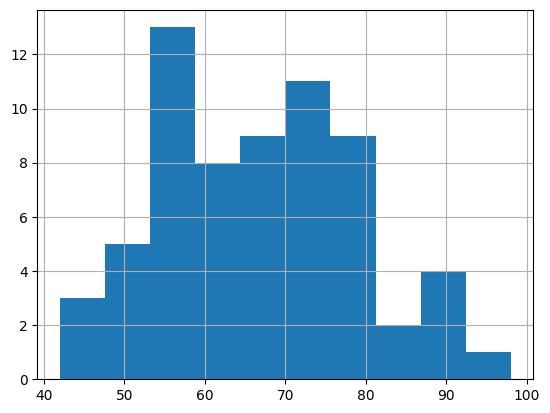

In [1202]:
h0_old = h_0_old_experimental_data['H0 [km s-1 Mpc-1]']
h0_modern = h_0_modern_experimental_data['H0 [km s-1 Mpc-1]']
h0_old.hist()

A histogram of old experimental data demonstrates the large disagreement in values of H0 in old measurements. The distribution appears bimodal.

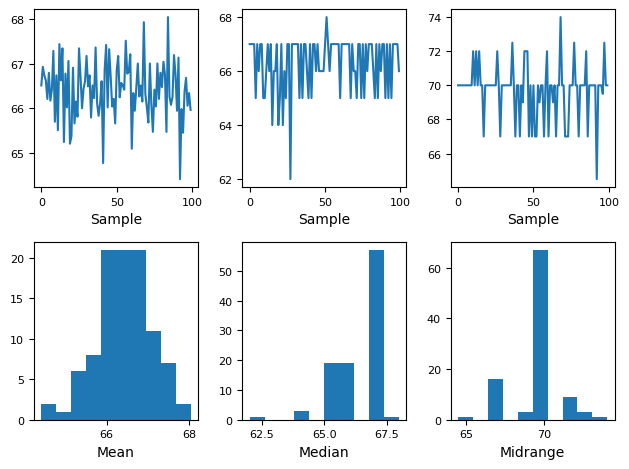

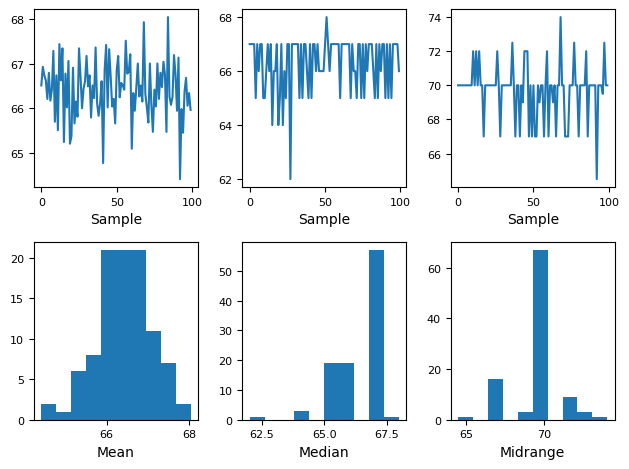

In [1203]:
pd.plotting.bootstrap_plot(h0_old,size=53,samples=100)

In [1204]:
h_0_modern_experimental_data.__len__()

33

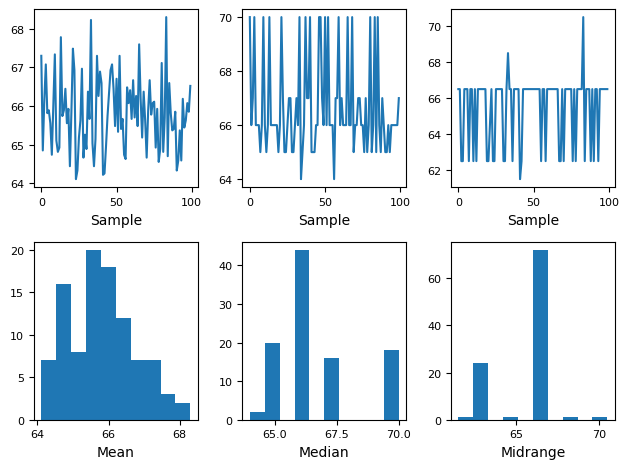

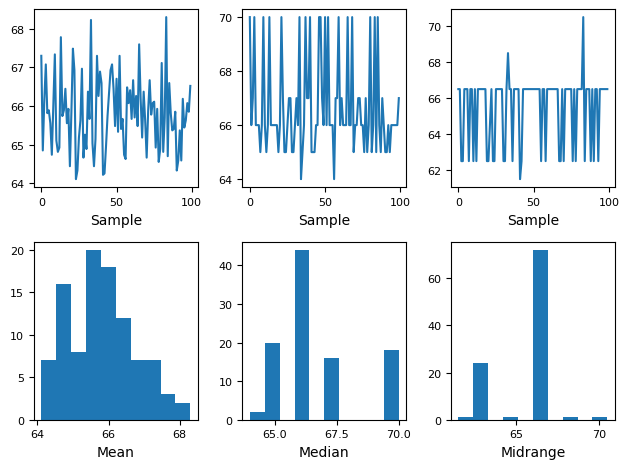

In [1205]:
pd.plotting.bootstrap_plot(h_0_modern_experimental_data['H0 [km s-1 Mpc-1]'],size=27,samples=100)

To culminate the data analysis I would like to create a final stratified data set for part B data

In [1206]:
#Filter out the LC type due its abnormal spread
filtered_experimental_data = h_0_modern_experimental_data[h_0_modern_experimental_data['Type'] != 'LC']
#Filter out types which appear only once because its not possible to decipher the quality of the data
type_counts = filtered_experimental_data['Type'].value_counts()
filtered_experimental_data = filtered_experimental_data[
    ~filtered_experimental_data['Type'].isin(
        type_counts[type_counts == 1].index
    )
]

Lets create a final box plot

In [1207]:
#Instantiate a dictionary to hold each type
dfs = {}

# Iterate over unique values in the 'Type' column and create separate DataFrames
for t in filtered_experimental_data['Type'].unique():
    #Implement dictionary element containing only records with the current unique type
    dfs[t] = filtered_experimental_data[filtered_experimental_data['Type'] == t]

# Access each DataFrame by its corresponding type

# Initialize dictionaries to store average values and errors
avg_values = {}
upper_quartile = {}
avg_errors_plus = {}
avg_errors_minus = {}
upper_quartiles = {}
lower_quartiles = {}

# Calculate the average value and error for each DataFrame
for t, data in dfs.items():
    avg_values[t] = data['H0 [km s-1 Mpc-1]'].mean()
    avg_errors_plus[t] = (data['errors (+)'].abs().mean()) 
    avg_errors_minus[t] = (data['errors (-)'].abs().mean()) 
    upper_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.75)
    lower_quartiles[t] = data['H0 [km s-1 Mpc-1]'].quantile(0.25)





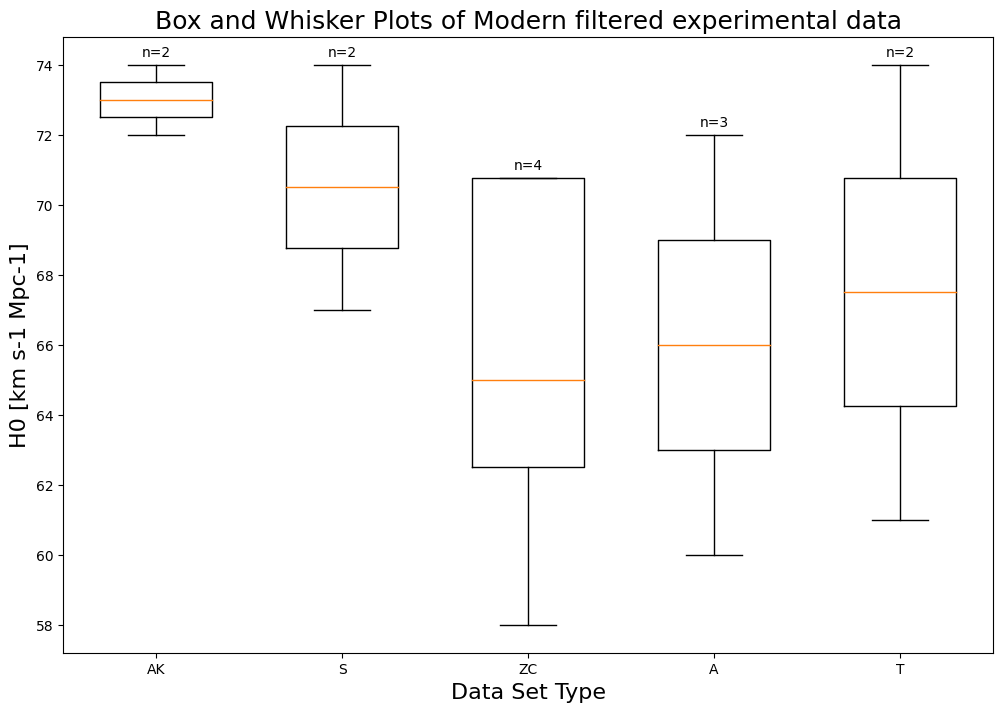

In [1208]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the position variable
pos = 1

# Create a box and whisker plot for each DataFrame
for t, data in dfs.items():
    num_items = len(data)
    box = ax.boxplot(data['H0 [km s-1 Mpc-1]'], positions=[pos], labels=[t], widths=0.6, showfliers=False)
    ax.text(pos, box['caps'][1].get_ydata()[0] + 0.25, f'n={num_items}', ha='center', fontsize=10)
    pos += 1

# Set the title and labels
ax.set_title('Box and Whisker Plots of Modern filtered experimental data', fontsize=18)
ax.set_xlabel('Data Set Type', fontsize=16)
ax.set_ylabel('H0 [km s-1 Mpc-1]', fontsize=16)

# Show the plot
plt.show()